<a href="https://colab.research.google.com/github/siddheshsabnis/ALL_Projects_SEM/blob/main/AI_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)

In [ ]:
#Read Data from csv file
df=pd.read_csv("amazon.csv")

In [ ]:
#Displays first 5 Rows
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [ ]:
#Display Dataframe
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [ ]:
# Sort DataFrame by 'wilson_lower_bound' in descending order, drop 'Unnamed: 0' column, and display the first 5 rows.
df = df.sort_values("wilson_lower_bound",ascending=False)
df.drop('Unnamed: 0',inplace=True, axis=1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [ ]:
# Function to analyze missing values in DataFrame columns and their ratios as a percentage of total rows.
def missing_value_analysis(df):
  na_columns_=[col for col in df.columns if df[col].isnull().sum()>0]
  n_miss=df[na_columns_].isnull().sum().sort_values(ascending=True)
  ratio_=(df[na_columns_].isnull().sum() / df.shape[0]*100).sort_values(ascending=True)
  missing_df=pd.concat([n_miss,np.round(ratio_,2)], axis=1,keys=['Missing Values','Ratio'])
  missing_df=pd.DataFrame(missing_df)
  return missing_df

def check_dataframe(df,head=5,tail=5):

  print("SHAPE".center(82,'~'))
  print('Rows:{}'.format(df.shape[0]))
  print('columns:{}'.format(df.shape[1]))
  print("TYPES".center(82,'~'))
  print(df.dtypes)
  print("".center(82,'~'))
  print(missing_value_analysis(df))
  print('DUPLICATED VALUES'.center(83,'~'))
  print(df.duplicated().sum())
  print("QUANTILES".center(82,'~'))
  print(df.quantile([0,0.05,0.50,0.95,0.99,1]).T)

check_dataframe(df)







~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows:4915
columns:11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing Values  Ratio
reviewerName               1   0.02
reviewText                 1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00  0.05   0.50        0.95       0.99         1.00
overall   

In [ ]:
# Function to check the number of unique classes in each column of the given DataFrame.
def check_class(dataframe):
  nunique_df=pd.DataFrame({'Variable':dataframe.columns,'Classes':[dataframe[i].nunique() \
                                                          for i in dataframe.columns]})
  nunique_df=nunique_df.sort_values('Classes',ascending=False)
  nunique_df=nunique_df.reset_index(drop=True)
  return nunique_df

check_class(df)


,Variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


from matplotlib import pyplot as plt
_df_0['Classes'].plot(kind='hist', bins=20, title='Classes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Classes'].plot(kind='line', figsize=(8, 4), title='Classes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Classes'].plot(kind='hist', bins=20, title='Classes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Classes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Classes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Classes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Classes'].plot(kind='line', figsize=(8, 4), title='Classes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Function to generate a subplot with a countplot and a pie chart for a categorical variable.
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

constraints = ['#B34D22', '#EBE00C', '#1FEB0C', '#0C92EB', '#EB0CD5']

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentage'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=df[column_name].value_counts().values.tolist(),
                         x=[str(i) for i in df[column_name].value_counts().index],
                         text=df[column_name].value_counts().values.tolist(),
                         textfont=dict(size=14),
                         name=column_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=constraints,
                                     line=dict(color='#DBE6EC', width=1))),
                  row=1, col=1)  # Corrected 'column' to 'col' here

    fig.add_trace(go.Pie(labels=df[column_name].value_counts().keys(),
                         values=df[column_name].value_counts().values,
                         textfont=dict(size=18),
                         textposition='auto',
                         showlegend=False,
                         name=column_name,
                         marker=dict(colors=constraints)),
                  row=1, col=2)

    fig.update_layout(title={'text': column_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)




In [ ]:
# Import Plotly's IO module for rendering interactive plots.
import plotly.io as pio

# Configure Plotly to work in Google Colab
pio.renderers.default = 'colab'

# Call the function with your DataFrame and column_name
categorical_variable_summary(df, 'overall')


In [ ]:
# Display the first 5 rows of the 'reviewText' column in the DataFrame 'df'.
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [ ]:
# Extracts the review text at index 2031 from the 'reviewText' column and stores it in the variable 'review_example'.
review_example=df.reviewText[2031]
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [ ]:
# Converts the review text to lowercase and splits it into a list of words.
review_example=review_example.lower().split()

In [ ]:
#Display Review Example
review_example

['[[',
 'update',
 '-',
 '6/19/2014',
 ']]so',
 'my',
 'lovely',
 'wife',
 'bought',
 'me',
 'a',
 'samsung',
 'galaxy',
 'tab',
 '4',
 'for',
 "father's",
 'day',
 'and',
 "i've",
 'been',
 'loving',
 'it',
 'ever',
 'since.',
 'just',
 'as',
 'other',
 'with',
 'samsung',
 'products,',
 'the',
 'galaxy',
 'tab',
 '4',
 'has',
 'the',
 'ability',
 'to',
 'add',
 'a',
 'microsd',
 'card',
 'to',
 'expand',
 'the',
 'memory',
 'on',
 'the',
 'device.',
 'since',
 "it's",
 'been',
 'over',
 'a',
 'year,',
 'i',
 'decided',
 'to',
 'do',
 'some',
 'more',
 'research',
 'to',
 'see',
 'if',
 'sandisk',
 'offered',
 'anything',
 'new.',
 'as',
 'of',
 '6/19/2014,',
 'their',
 'product',
 'lineup',
 'for',
 'microsd',
 'cards',
 'from',
 'worst',
 'to',
 'best',
 '(performance-wise)',
 'are',
 'the',
 'as',
 'follows:sandisksandisk',
 'ultrasandisk',
 'ultra',
 'plussandisk',
 'extremesandisk',
 'extreme',
 'plussandisk',
 'extreme',
 'pronow,',
 'the',
 'difference',
 'between',
 'all',
 'o

In [ ]:
# Lambda function removes non-alphabetic characters, converts text to lowercase, and displays the modified DataFrame.
rt=lambda x:re.sub("[^a-zA-Z]",' ',str(x))
df["reviewText"]=df["reviewText"].map(rt)
df["reviewText"]=df["reviewText"].str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [ ]:
#Install VaderSentiment
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
# Analyzes sentiment using TextBlob for polarity and subjectivity, and VADER for overall sentiment, updating the 'sentiment' column.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df[['polarity','subjectivity']]=df['reviewText'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

for index, row in df['reviewText'].iteritems():

  score= SentimentIntensityAnalyzer().polarity_scores(row)

  neg=score['neg']
  neu=score['neu']
  pos=score['pos']
  if neg>pos:
    df.loc[index,'sentiment']="Negative"
  elif pos>neg:
      df.loc[index,'sentiment']="Positive"
  else:
    df.loc[index,'sentiment']="Neutral"

In [ ]:
# Filters, sorts, and displays the top 5 rows of positive sentiment reviews with high confidence.
df[df["sentiment"]=="Positive"].sort_values("wilson_lower_bound",ascending=False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


In [ ]:
# Generates countplot and pie chart summarizing the distribution of sentiment categories in the 'sentiment' column of the DataFrame.
categorical_variable_summary(df,'sentiment')

In [ ]:
#Install transformers
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.4 MB/s eta 0:00:00


In [ ]:
# Imports necessary libraries, loads data, initializes BERT tokenizer and model, and sets the maximum sequence length for input.
df = pd.read_csv("amazon.csv")
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification

# Load the CSV file into a DataFrame
df = pd.read_csv("amazon.csv")

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Choose an appropriate max sequence length
max_length = 128


(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Assigns sentiment labels: 0 for negative (ratings <= 2), 1 for neutral (rating = 3), and 2 for positive (ratings >= 4).
labels = df['overall'].map(lambda x: 0 if x <= 2 else 1 if x == 3 else 2)  # Assuming 1, 2 as negative, 3 as neutral, 4, 5 as positive


In [ ]:
# Clones the NVIDIA Apex repository, enters the directory, and installs the library with CUDA and C++ extensions for optimized deep learning training.
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./


Cloning into 'apex'...
remote: Enumerating objects: 11468, done.
remote: Counting objects: 100% (3536/3536), done.
remote: Compressing objects: 100% (470/470), done.
remote: Total 11468 (delta 3226), reused 3159 (delta 3063), pack-reused 7932
Receiving objects: 100% (11468/11468), 15.41 MiB | 13.80 MiB/s, done.
Resolving deltas: 100% (8055/8055), done.
/content/apex
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing /content/apex
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.9 MB/s eta 0:00:00
    Getting requirements to build wheel: started
    Running command Ge

In [ ]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load the CSV file into a DataFrame
df = pd.read_csv("/content/amazon.csv")

# Sample a subset of the dataset (adjust the 'n' parameter as needed)
df_sampled = df.sample(n=100)

# Convert non-string entries in the 'reviewText' column to strings
df_sampled['reviewText'] = df_sampled['reviewText'].astype(str)

# Initialize the DistilBERT tokenizer and model
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the text data and create inputs for the model
max_length = 128  # Adjust the max sequence length as needed
inputs = tokenizer(df_sampled['reviewText'].tolist(), padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# Create a DataLoader for your dataset
batch_size = 32  # Adjust the batch size as needed
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)  # Adjust the learning rate as needed
criterion = torch.nn.CrossEntropyLoss()

# Train the model
num_epochs = 2  # Reduce the number of epochs if necessary

for epoch in range(num_epochs):
    total_loss = 0
    for i, batch in enumerate(dataloader):
        input_ids, attention_mask = batch
        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        targets = torch.zeros_like(logits.argmax(dim=1))
        loss = criterion(logits, targets)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}')

# Save the trained model if needed
torch.save(model.state_dict(), 'distilbert_sentiment_model_sample.pth')


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2, Loss: 0.5796
Epoch 2/2, Loss: 0.3933


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Classification Report for the Sample:
              precision    recall  f1-score   support

     unknown       0.00      0.00      0.00     100.0

   micro avg       0.00      0.00      0.00     100.0
   macro avg       0.00      0.00      0.00     100.0
weighted avg       0.00      0.00      0.00     100.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

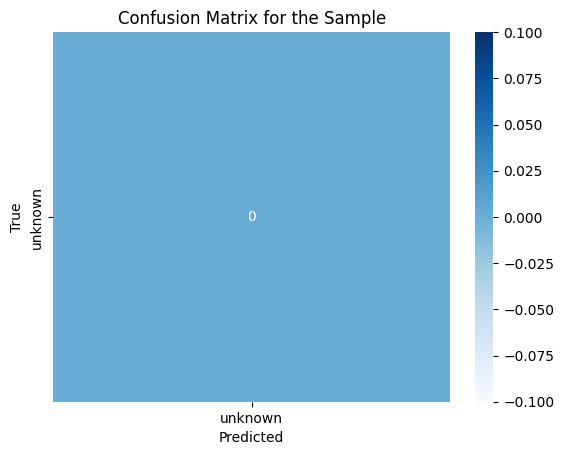

Predictions for the 'unknown' class:
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unknown, Predicted: neutral
True: unkno

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("/content/amazon.csv")

# Sample a subset of the dataset (adjust the 'n' parameter as needed)
df_sampled = df.sample(n=100)

# Convert non-string entries and NaN values in the 'reviewText' column to strings
df_sampled['reviewText'] = df_sampled['reviewText'].astype(str)

# Remove rows with NaN values in the 'reviewText' column
df_sampled = df_sampled.dropna(subset=['reviewText'])

# Initialize the BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Assuming 3 classes: negative, neutral, positive

# Tokenize the text data and create inputs for the model
inputs = tokenizer(df_sampled['reviewText'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Prepare DataLoader
batch_size = 8  # Adjust batch size as needed
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Predict sentiments for the sample
predicted_labels = []
true_labels = []

model.eval()
with torch.no_grad():
    for batch in dataloader:
        input_ids, attention_mask = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        predicted_labels.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        true_labels.extend(input_ids[:, 0].cpu().numpy())  # Assuming labels are in the first position of input_ids

# Convert numerical labels back to original sentiments
label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_sentiments = [label_map.get(label, 'unknown') for label in predicted_labels]
true_sentiments = [label_map.get(label.item(), 'unknown') for label in true_labels]  # Fix here

# Specify the actual classes present in your sampled dataset
actual_classes = set(true_sentiments)

# Calculate and display the classification report for the sample
print("Classification Report for the Sample:")
print(classification_report(true_sentiments, predicted_sentiments, labels=list(actual_classes)))

# Generate and display the confusion matrix as a heatmap for the sample
confusion = confusion_matrix(true_sentiments, predicted_sentiments, labels=list(actual_classes))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=list(actual_classes), yticklabels=list(actual_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Sample')
plt.show()


# Print some predictions for the 'unknown' class
print("Predictions for the 'unknown' class:")
for true_sentiment, predicted_sentiment in zip(true_sentiments, predicted_sentiments):
    if true_sentiment == 'unknown':
        print(f"True: {true_sentiment}, Predicted: {predicted_sentiment}")




In [ ]:
!pip install comtypes


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install gTTS


In [ ]:
pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 10.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
import speech_recognition as sr
from transformers import BertTokenizer, BertForSequenceClassification
from gtts import gTTS
import IPython.display as ipd
import os

# Load Amazon reviews dataset
df = pd.read_csv("/content/amazon.csv")  # Update the file path if necessary

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1)
    sentiment_labels = ['Positive' if pred.item() == 1 else 'Negative' for pred in predictions]
    return sentiment_labels[0]

def perform_sentiment_analysis(audio_data):
    user_input = recognizer.recognize_google(audio_data).lower()
    print("You said:", user_input)

    # Perform sentiment analysis
    sentiment = analyze_sentiment(user_input)
    print("Sentiment:", sentiment)

    # Convert response to speech using gTTS
    response = f"The sentiment of the spoken text is {sentiment}."
    tts = gTTS(text=response, lang='en')
    tts.save("output.mp3")

    # Play the generated audio
    ipd.Audio("output.mp3")

# Initialize the recognizer
recognizer = sr.Recognizer()

# Ensure the correct file path
file_path = "/content/voice_input.wav"

# Check if the file exists
if os.path.exists(file_path):
    print(f"Full path: {file_path}")
    print("File exists: True")

    with sr.AudioFile(file_path) as source:
        print("Listening...")
        audio_data = recognizer.record(source)

        try:
            perform_sentiment_analysis(audio_data)
        except sr.UnknownValueError:
            print("Sorry, I could not understand your audio.")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")

else:
    print(f"Full path: {file_path}")
    print("File exists: False")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Full path: /content/voice_input.wav
File exists: True
Listening...
You said: it works as expected i should have sprung for the higher capacity i think it's made a bit easier than the earlier versions the paint looks not as clean as before
Sentiment: Positive
